<a href="https://colab.research.google.com/github/N-Linh/ML/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X = np.linspace(-10, 10, 200)
y = 1/(1+np.exp(-X))

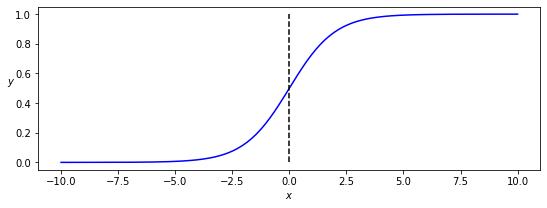

In [ ]:
plt.figure(figsize=(9, 3))
plt.plot(X, y, "b-")
plt.plot([0, 0], [0, 1], "k--")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.show()

In [ ]:
from sklearn import datasets
iris_data = datasets.load_iris()

In [ ]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

using 1 feature: pental length

decision bound: a point separate x-axis
theta1.x1 + theta0 = 0


In [ ]:
X = iris_data["data"][:, 3:]#pental witdth
y = np.array(iris_data["target"] == 2).astype(int).reshape(150, 1)#1 if virginica else not virginica
X.shape, y.shape

((150, 1), (150, 1))

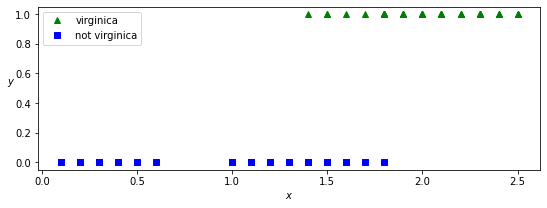

In [ ]:
neg_index = np.where(y == 0)
pos_index = np.where(y == 1)
plt.figure(figsize=(9, 3))
plt.plot(X[pos_index], y[pos_index], "g^", label="virginica")
plt.plot(X[neg_index], y[neg_index], "bs", label="not virginica")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.legend()
plt.show()

In [ ]:
X_com = np.c_[np.ones((150, 1)), X]
X_com.shape

(150, 2)

In [ ]:
theta = np.random.randn(2, 1)
lr = 0.01
epochs = 30000
m = len(X)
for epoch in range(epochs):
  grad = 1/m * np.dot(X_com.T, 1/(1 + np.exp(-np.dot(X_com, theta))) - y)
  theta = theta - lr*grad
theta

array([[-7.83995125],
       [ 4.80264612]])

In [ ]:
X_pred = np.linspace(0, 3, 1000)
X_pred_com = np.c_[np.ones((1000, 1)), X_pred]
X_pred_com.shape

(1000, 2)

In [ ]:
y_pred = 1/(1 + np.exp(-np.dot(X_pred_com, theta)))

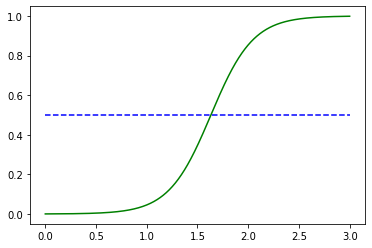

In [ ]:
plt.plot(X_pred, y_pred, "g-")
plt.plot([0, 3], [0.5, 0.5], "b--")

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [ ]:
log_reg.intercept_, log_reg.coef_

(array([-7.1947083]), array([[4.3330846]]))

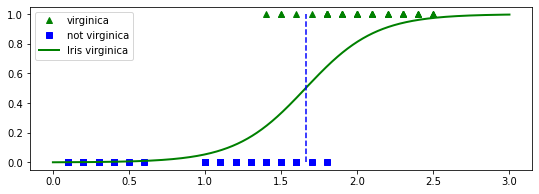

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_bound = X_new[y_proba[:, 1] >= 0.5][0][0]

neg_index = np.where(y == 0)
pos_index = np.where(y == 1)
plt.figure(figsize=(9, 3))
plt.plot(X[np.where(y == 1)], y[np.where(y == 1)], "g^", label="virginica")
plt.plot(X[np.where(y == 0)], y[np.where(y == 0)], "bs", label="not virginica")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot([decision_bound, decision_bound], [0, 1], "b--")
plt.legend()

decision bound (1 feature):

In [ ]:
decision_bound

1.6606606606606606

In [ ]:
log_reg.predict([[1.7], [decision_bound], [1.5]])

array([1, 1, 0])

using 2 feature: petal width, pental length

decision bound is a line separating oxy. theta0 + x1.theta1 + x2.theta2 = 0

In [ ]:
X = iris_data["data"][:, (2, 3)]  # petal length, petal width
y = (iris_data["target"] == 2).astype(np.int)
X.shape, y.shape

((150, 2), (150,))

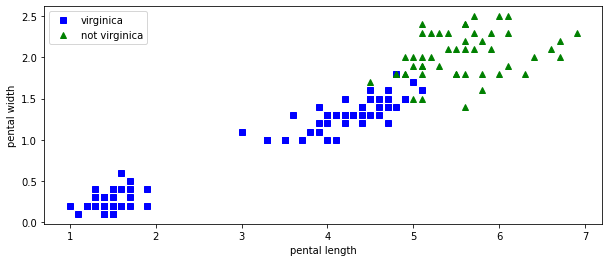

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="not virginica")
plt.xlabel("pental length")
plt.ylabel("pental width")
plt.legend()

In [ ]:
xs = np.linspace(1, 5, 5)
ys = np.linspace(1, 3, 3)
zs = np.meshgrid(xs, ys)
zs[0].ravel(), zs[1].ravel()

(array([1., 2., 3., 4., 5., 1., 2., 3., 4., 5., 1., 2., 3., 4., 5.]),
 array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.]))

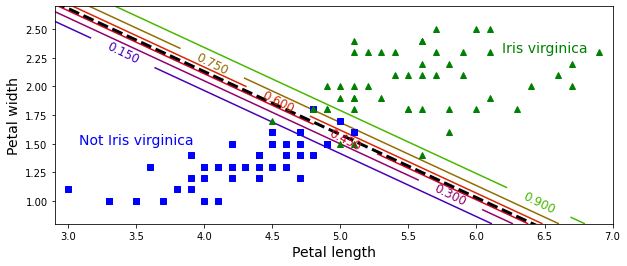

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]# theta0 + x1.theta1 + x2*theta2 = 0, x2 = -(x1.theta1 + theta0)/theta2

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [ ]:
log_reg.intercept_, log_reg.coef_, 

(array([-45.27248302]), array([[ 5.75452052, 10.44681114]]))

sofmax regressregression

In [ ]:
X = iris_data["data"][:, (2, 3)]  # petal length, petal width
y = iris_data["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

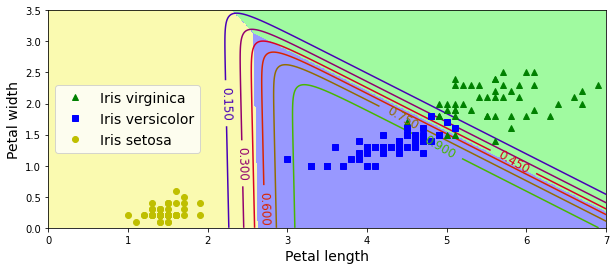

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [ ]:
softmax_reg.predict(np.array([[0, 0], [3, 2], [7, 3.5]]))

array([0, 1, 2])